# Árboles de decisión para clasificación

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("datasets/iris.csv")
print(data.shape)
data.head()

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

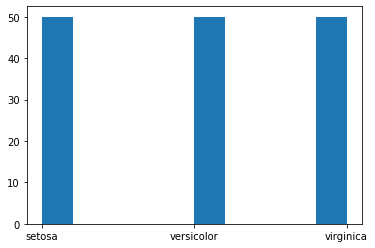

In [26]:
plt.hist(data.Species)

In [27]:
colnames = data.columns.values.tolist()
var_independientes = colnames[:4]
var_objetivo = colnames[4]

## Conjuntos de entrenamiento y prueba

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)

print("Entrenamiento: " + str(len(train)))
print("Test: " + str(len(test)))

Entrenamiento: 120
Test: 30


In [29]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,6.4,3.2,4.5,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica
110,6.5,3.2,5.1,2.0,virginica
67,5.8,2.7,4.1,1.0,versicolor
149,5.9,3.0,5.1,1.8,virginica


(array([41.,  0.,  0.,  0.,  0., 39.,  0.,  0.,  0., 40.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

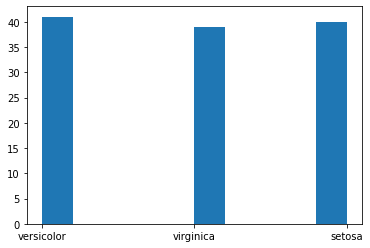

In [30]:
plt.hist(train.Species)

## Árbol de decisión

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
decision_tree.fit(train[var_independientes], train[var_objetivo])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [33]:
#realizamos algunas predicciones
predicciones = decision_tree.predict(test[var_independientes])

In [34]:
# Examinamos la matriz de confusión
pd.crosstab(test[var_objetivo], predicciones, rownames=["Real"], colnames=["Prediccion"])

Prediccion,setosa,versicolor,virginica
Real,,,
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


### Representación

In [35]:
from sklearn.tree import export_graphviz

In [36]:
with open("outputs/decision_tree.dot", "w") as dotfile:
    export_graphviz(decision_tree, out_file=dotfile, feature_names=var_independientes)
    dotfile.close()

In [37]:
import os
from graphviz import Source

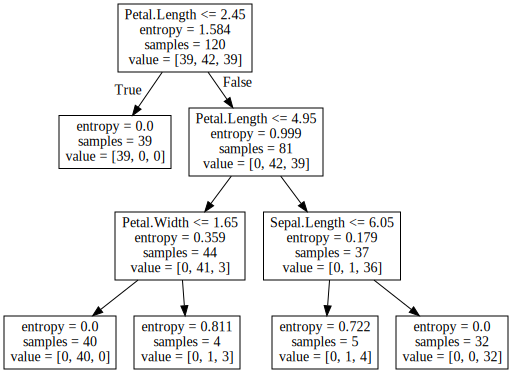

In [15]:
file = open("outputs/decision_tree.dot", "r")
text = file.read()
Source(text)

## Cross Validation
Utilizaremos el método de validación cruzada para realizar la poda del arbol, ya que si no podamos podemos tener problemas de overfitting.

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
X = train[var_independientes]
Y = train[var_objetivo]

In [18]:
for i in range(1,5):
    # modelo de aprendizaje
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=80)
    dtree.fit(X,Y)
    
    # hacemos las subdivisiones
    conjuntos = KFold(n_splits= 10, shuffle=True, random_state=1)
    eficacias = cross_val_score(dtree, X, Y, scoring="accuracy", cv = conjuntos, n_jobs = 1)
    eficacia = np.mean(eficacias)
    
    print('Eficacia para i [', i, " = ", eficacia, "]"", relevancias: ", dtree.feature_importances_)

Eficacia para i [ 1  =  0.6749999999999999 ], relevancias:  [0. 0. 0. 1.]
Eficacia para i [ 2  =  0.9416666666666667 ], relevancias:  [0.         0.         0.34885216 0.65114784]
Eficacia para i [ 3  =  0.9749999999999999 ], relevancias:  [0.01649718 0.         0.31919334 0.66430948]
Eficacia para i [ 4  =  0.9749999999999999 ], relevancias:  [0.01649718 0.         0.31919334 0.66430948]


## Random forest
Se realizan varios modelos independientes, y el resultado final se calcula mediante votos por mayoría (en clasificación) o el promedio (en regresión) del resultado que se obtenga al aplicar cada uno de esos modelos.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
random_forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
random_forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [21]:
random_forest.oob_decision_function_
# vemos lo que han consensuado los arboles (voto por mayoria) podemos ver cada observación en que categoría cae.

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.97826087, 0.02173913],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.97368421, 0.02631579, 0.        ],
       [0.        , 0.31578947, 0.68421053],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.02380952, 0.97619048],
       [0.        , 0.91428571, 0.08571429],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.61111111, 0.38888889],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.28571429, 0.71428571],
       [0.

In [22]:
random_forest.oob_score_
# precisión

0.95

In [23]:
random_forest.predict(test[var_independientes])

array(['setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)